##**Problem Statement:**
  The goal is to analyze Netflix’s content dataset to uncover trends and patterns that can guide strategic decisions on which types of shows or movies to produce and identify opportunities for business growth in different countries. The insights will be entirely data-driven, ensuring alignment with audience preferences and market potential.

###**Objective:**
  To explore and analyze Netflix’s catalog data to understand content distribution, audience trends, and regional preferences, and to provide actionable insights that support data-driven decisions for content production and market expansion.



# Import required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download required dataset

In [4]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 14.0MB/s]


# Loading the data

In [5]:
df=pd.read_csv('netflix.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# Basic Data Analysis

In [ ]:
#to find the shape of dataframe (rows,columns)
df.shape

(8807, 12)

In [ ]:
#to find datatype of column present in dataframe
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [40]:
df.fillna(0, inplace=True)

/tmp/ipython-input-4231983114.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


In [47]:
#convert type of values of 'date_added' columns from string to datetime format.
df['date_added']=pd.to_datetime(df['date_added'],format='mixed')

In [30]:
#Segregate year,month and day from 'date_added' column
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month_name()
df['day']=df['date_added'].dt.day
df['week_day']=df['date_added'].dt.day_name()
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year,month,day,week_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,25.0,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,24.0,Friday


###Seasonality

In [ ]:
# to find the seasonality of Netflix movies/tv_shows

seasonality = df.groupby(["type","month"]).size().reset_index(name="count").sort_values(by="count", ascending=False)
seasonality.head(5)

,type,month,count
5,Movie,July,565
0,Movie,April,550
2,Movie,December,547
4,Movie,January,546
10,Movie,October,545


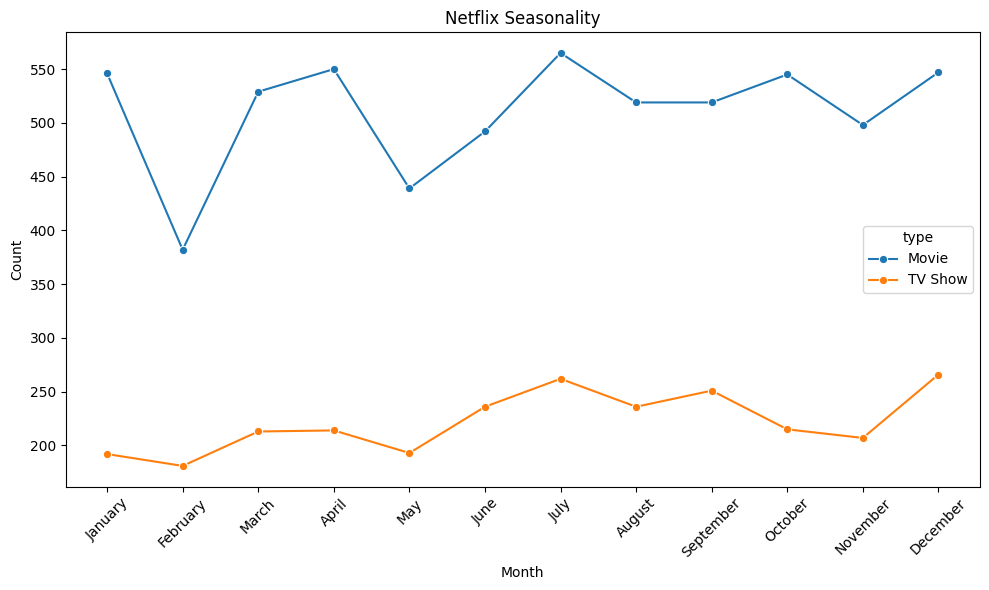

In [ ]:
#plotting of above analysis

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# Convert seasonality["month"] to categorical with correct order
seasonality["month"] = pd.Categorical(seasonality["month"],
                                      categories=month_order,
                                      ordered=True)

# Now plot
plt.figure(figsize=(10,6))
sns.lineplot(data=seasonality, x="month", y="count", hue="type", marker="o")
plt.title("Netflix Seasonality")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:-

*   July and December are the most favorable months to release new content (both Movies & TV Shows). Netflix may be aligning with holiday breaks (summer + Christmas/New Year) when streaming demand is higher.
*   Fewer releases in February could mean less competition. Netflix could experiment with counter-programming (launch exclusive titles in February to capture audience attention when options are fewer).



In [22]:
#Rename the column 'listed_in' as 'genre'
df.rename(columns={'listed_in':'genre'},inplace=True)
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year,month,day,week_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,25.0,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,24.0,Friday


In [23]:
#save all genres given in data into all_genre.
all_genre=[]

for items in df['genre'].str.split(','):
  all_genre.extend(items)

genre=pd.Series(all_genre)
genre.value_counts().head(5)

,count
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829


Insights :- Top 5 Genre streamed on netflix are :
1.   International Movies-2624
2.   Dramas-1600
3.   Comedies-1210
4.   Action & Adventure-859
5.   Documentaries-829



# Exploration

1. Univariate
2. Bivariate
3. Multi-variate

In [ ]:
# to find the count of types of movies/videos stream on Netflix
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
#percentage of value_counts
df['type'].value_counts(normalize=True)*100

,proportion
type,
Movie,69.615079
TV Show,30.384921


Insights :- 69% of movie and 30% of tv_shows data are streamed on Netflix.

In [9]:
#dividing the Netflix data into two categories : movies dataframe and tv_shows dataframe
movies=df[df['type']=='Movie'].reset_index(drop=True)
tv_shows=df[df['type']=='TV Show'].reset_index(drop=True)

In [ ]:
#displaying 3 rows of movies dataframe
movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year,month,day,week_day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,25.0,Saturday
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,24.0,Friday
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,24.0,Friday


In [18]:
#displaying 3 rows of tv_shows dataframe
tv_shows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


**1. Who is the popular director ?**

In [19]:
#to find the popular director by calculating the value_count of each director
top_5_popular_director=df.groupby(['director', 'type']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(5)
top_5_popular_director


,director,type,count
3428,Rajiv Chilaka,Movie,19
3479,"Raúl Campos, Jan Suter",Movie,18
4087,Suhas Kadav,Movie,16
2622,Marcus Raboy,Movie,15
1803,Jay Karas,Movie,14


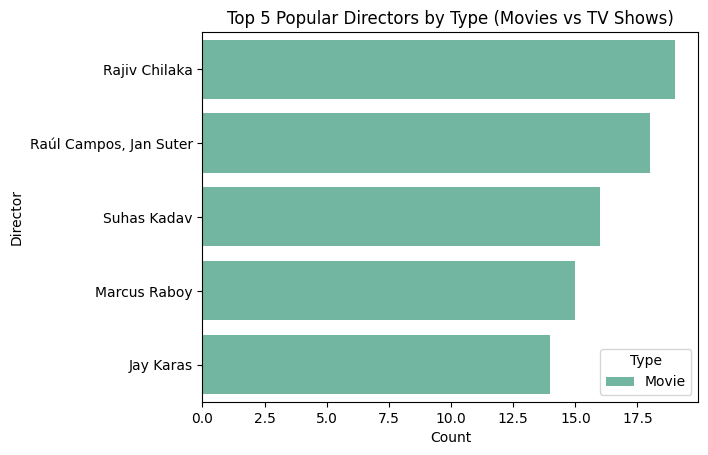

In [ ]:
#Step-2:- Plotting the analysis on graph
sns.barplot(
    data=top_5_popular_director,
    x='count',
    y='director',
    hue='type',
    palette='Set2'
)
plt.title("Top 5 Popular Directors by Type (Movies vs TV Shows)")
plt.xlabel("Count")
plt.ylabel("Director")
plt.legend(title="Type")
plt.show()

Insights:- After analysing top 10 directors, it has been observed that a few directors dominate the Netflix catalog with a high number of titles. Rajiv Chilaka leads with 19 movies, followed by Raúl Campos & Jan Suter with 18 movies. This suggests that Netflix collaborates repeatedly with certain directors, potentially due to their consistent audience appeal or specialization in specific genres.

**2. Which genre people are watching most ?**

In [25]:
#Step-1:- to find most_watching_genre by calculating the value_count of each genre
Most_watching_genre=pd.Series(all_genre).value_counts().head(5)
Most_watching_genre

,count
International Movies,2624
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829


/tmp/ipython-input-3064992030.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Most_watching_genre.values, y=Most_watching_genre.index, palette="viridis")


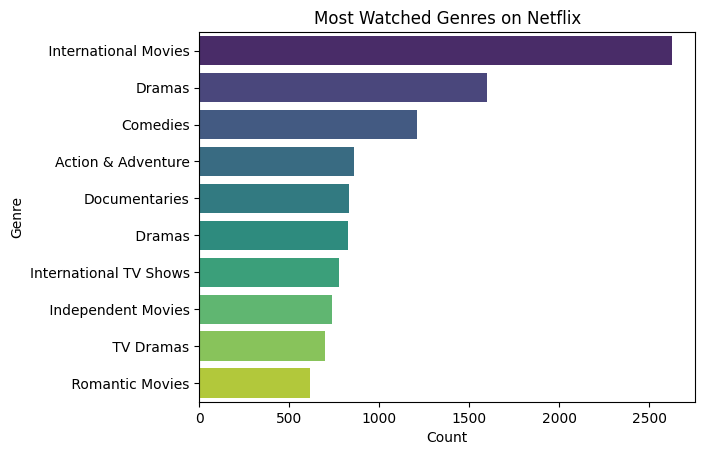

In [ ]:
#Step-2:- Plotting on graph
sns.barplot(x=Most_watching_genre.values, y=Most_watching_genre.index, palette="viridis")
plt.title("Most Watched Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

Insights:- People mostly likes International Movies to watch on Netflix.

**3. At what time of the day, it is best to release a movies ?**

In [31]:
#Step-1 :- to find the value_count of each day.. to get the maximum count on top..
best_release_day = df['week_day'].value_counts().index
print(best_release_day)

Index(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Saturday',
       'Sunday'],
      dtype='object', name='week_day')


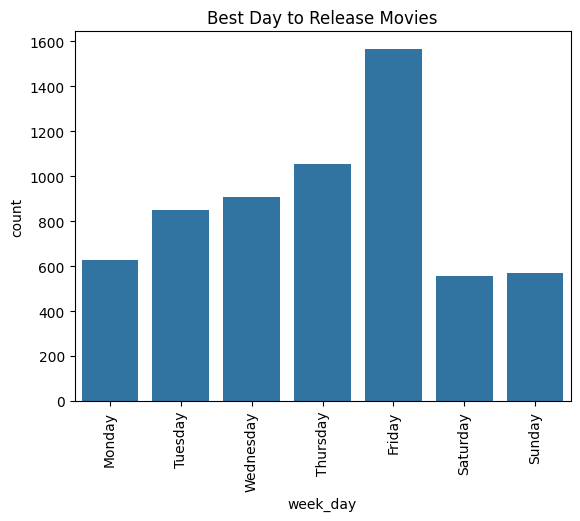

In [ ]:
#Step-2:- plotting the above analysis on bar graph
sns.countplot(x='week_day', data=movies,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Best Day to Release Movies')
plt.xticks(rotation=90)
plt.show()

Insights :- It is best to release a movie on 'Friday'.

**4. What type of content is available in different countries?**

STEP 1:- Group the Data

In [46]:
content_by_country=df.groupby(['country', 'type']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(5)
content_by_country

,country,type,count
687,United States,Movie,2058
286,India,Movie,893
688,United States,TV Show,760
0,0,Movie,440
1,0,TV Show,391


STEP 2:- Visualize

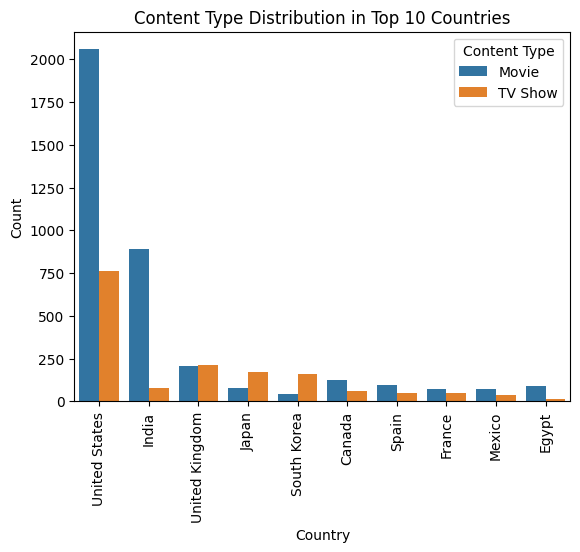

In [34]:
top_countries = (
    df['country'].value_counts().head(10)
      .index
)

filtered_df = df[df['country'].isin(top_countries)]

sns.countplot(
    data=filtered_df,
    x='country',
    hue='type',
    order=top_countries
)
plt.title("Content Type Distribution in Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Content Type")
plt.show()

Insights :
1.   Countries with more TV shows than movies:
  *    United Kingdom
  *    Japan
  *    South Korea

2.   Countries with a balanced distribution of movies & TV shows(less than 10% difference between counts):

  *   United Kingdom
  *   Mexico
  *   South Korea





**5. How has the number of movies released per year changed over the last 20-30 years?**

In [ ]:
df['release_year'].max()

2021

In [ ]:
recent_movies = movies[movies['release_year'] >= (2021 - 30)]

# Count per year
movies_per_year = recent_movies['release_year'].value_counts().sort_index()

movies_per_year.head(5)



,count
release_year,
1991,16
1992,20
1993,24
1994,20
1995,23


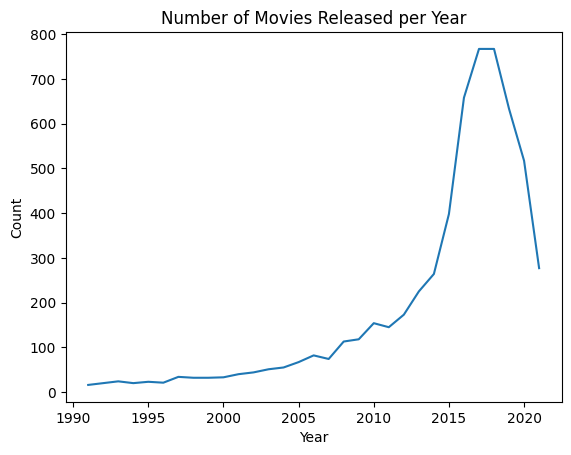

In [ ]:
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Insight :- Over the past 30 years, the number of movies released (available on Netflix) has shown a noticeable upward trend, especially after the mid-2000s. The growth accelerates around 2015–2020, likely due to Netflix’s expansion into original movie production and global licensing deals. The recent years show the highest counts, indicating Netflix’s focus on rapidly increasing its movie library to attract and retain subscribers.

**6. Comparison of tv shows vs. movies.**

Comparison includes :
*   Number of Movies vs TV Shows released each year
*   Which countries produce more Movies vs TV Shows
*   Most common genres for Movies vs TV Shows
*   For Movies → average/min/max runtime.
    For TV Shows → number of seasons.
*   Day when Movies vs TV Shows are released








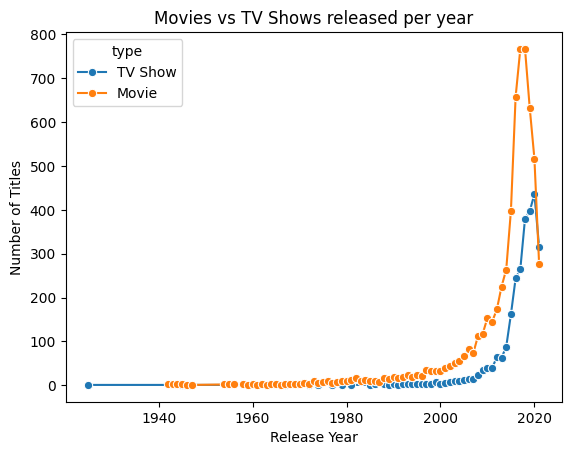

In [6]:
#Number of Movies vs TV Shows released each year

type_year = df.groupby(['release_year', 'type']).size().reset_index(name='count')
#plt.figure(figsize=(12,6))
sns.lineplot(data=type_year, x='release_year', y='count', hue='type', marker="o")
plt.title('Movies vs TV Shows released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


Insights :
*   Movies dominate overall output
*   Faster growth rate for TV Shows in late years


          

In [17]:
type_year.value_counts().head(5)

,,,count
release_year,type,count,
1925,TV Show,1,1
1942,Movie,2,1
1943,Movie,3,1
1944,Movie,3,1
1945,Movie,3,1


**7. What is the best day to launch a TV show?**

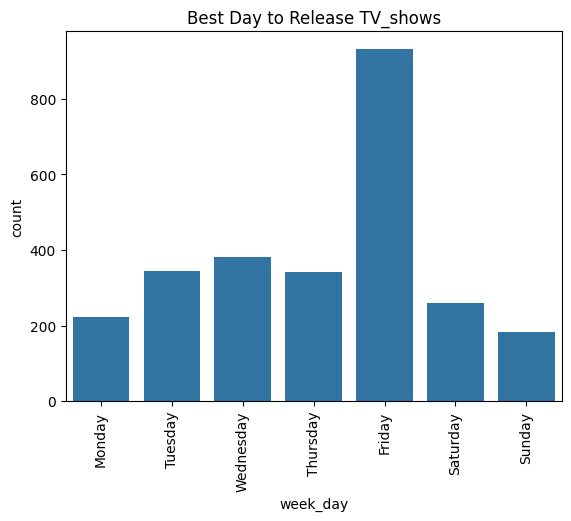

In [ ]:
#plotting of above analysis
sns.countplot(x='week_day', data=tv_shows,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Best Day to Release TV_shows')
plt.xticks(rotation=90)
plt.show()

Insights :- It is best to release a Tv_show on 'Friday'.

**8. Analysis of actors/directors of different types of shows/movies.**

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#Cast/director values may contain multiple names separated by commas → need to split into individual names.

all_directors = []

for items in df['director'].fillna(''):  # replace NaN with empty string
    all_directors.extend([name.strip() for name in str(items).split(',') if name.strip() != ''])

all_directors[:5]


['Kirsten Johnson',
 'Julien Leclercq',
 'Mike Flanagan',
 'Robert Cullen',
 'José Luis Ucha']

In [ ]:
all_actors = []

for items in df['cast'].fillna(''):  # replace NaN with empty string
    all_actors.extend([name.strip() for name in str(items).split(',') if name.strip() != ''])

all_actors[:5]

['Ama Qamata',
 'Khosi Ngema',
 'Gail Mabalane',
 'Thabang Molaba',
 'Dillon Windvogel']

*8.1 Analysis for Directors*

In [ ]:
#Count how many titles each director worked on, grouped by type (Movie vs TV Show).
top_5_popular_director=df.groupby(['director', 'type']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(5)
top_5_popular_director

,director,type,count
3428,Rajiv Chilaka,Movie,19
3479,"Raúl Campos, Jan Suter",Movie,18
4087,Suhas Kadav,Movie,16
2622,Marcus Raboy,Movie,15
1803,Jay Karas,Movie,14


Insights:- Movie-only directors 'Rajiv Chilaka' dominate in India → Netflix should invest in Bollywood films.

In [ ]:
#Do some directors specialize in Movies only or TV Shows only?
director_tv_shows_only=df[~df['director'].isin(movies['director'])]
director_tv_shows_only['director'].value_counts().head(5)


,count
director,
Alastair Fothergill,3
Hsu Fu-chun,2
Ken Burns,2
Iginio Straffi,2
Shin Won-ho,2


/tmp/ipython-input-2330903271.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_tv_shows_only['director'].value_counts().head(5).values, y=director_tv_shows_only['director'].value_counts().head(5).index, palette="viridis")


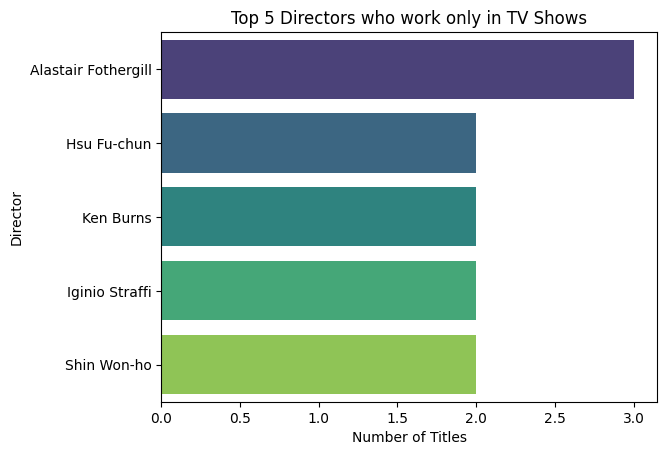

In [ ]:
sns.barplot(x=director_tv_shows_only['director'].value_counts().head(5).values, y=director_tv_shows_only['director'].value_counts().head(5).index, palette="viridis")
plt.title('Top 5 Directors who work only in TV Shows')
plt.ylabel('Director')
plt.xlabel('Number of Titles')
plt.show()

Insights :- TV-only directors 'Alastair Fothergill' dominate.

In [ ]:
director_movies_only=df[~df['director'].isin(tv_shows['director'])]
director_movies_only['director'].value_counts().head(5)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13


/tmp/ipython-input-2748581107.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_movies_only['director'].value_counts().head(5).values, y=director_movies_only['director'].value_counts().head(5).index, palette="viridis")


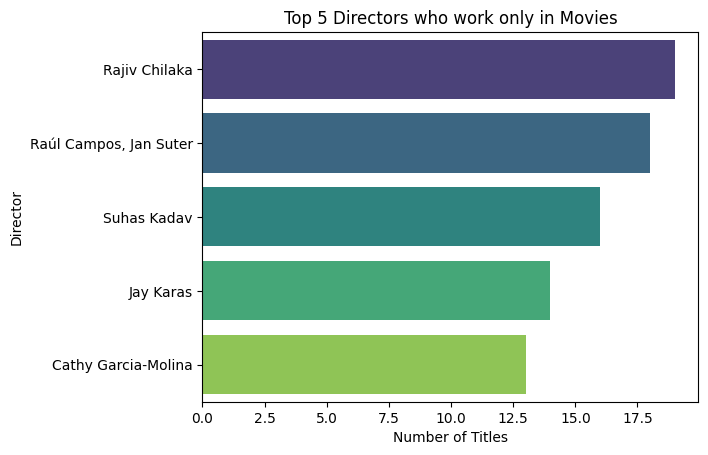

In [ ]:
sns.barplot(x=director_movies_only['director'].value_counts().head(5).values, y=director_movies_only['director'].value_counts().head(5).index, palette="viridis")
plt.title('Top 5 Directors who work only in Movies')
plt.ylabel('Director')
plt.xlabel('Number of Titles')
plt.show()

Insights:- Movie-only directors 'Rajiv Chilaka' dominate in India → Netflix should invest in Bollywood films.

In [ ]:
#Are there directors who work across both categories?

# Get unique directors in each type
movie_directors = movies['director'].unique()
tv_directors = tv_shows['director'].unique()

# Use Pandas Series.isin to filter directors in both
director_both = df[df['director'].isin(movie_directors) & df['director'].isin(tv_directors)]


In [ ]:
count_by_type = director_both.groupby(['director', 'type']).size().unstack(fill_value=0)
count_by_type['total'] = count_by_type.sum(axis=1)
top_5_directors_both = count_by_type.sort_values(by='total', ascending=False).head(5).drop(columns='total')

top_5_directors_both

type,Movie,TV Show
director,,
Marcus Raboy,15,1
Quentin Tarantino,7,1
Ryan Polito,7,1
Michael Simon,4,1
Oliver Stone,4,1


<Figure size 1000x600 with 0 Axes>

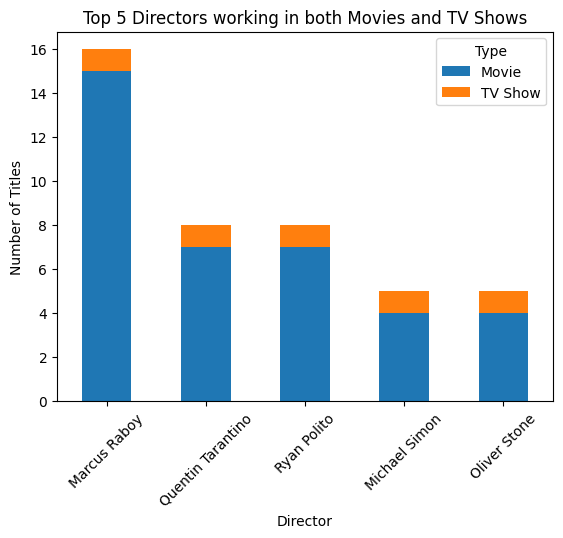

In [ ]:
#plotting above analysis

plt.figure(figsize=(10,6))
top_5_directors_both.plot(kind='bar', stacked=True)
plt.title('Top 5 Directors working in both Movies and TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Director')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

Insights:- Both-category talent 'Marcus Raboy' the most famous actor which dominates globally and gives Netflix flexibility to cast across formats.

*8.2 Analysis for Actors*

In [ ]:
#top 5 actors in dataframe
pd.Series(all_actors).value_counts().head(5)

,count
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32


In [ ]:
#To explode the data for cast column.

df['cast'] = df['cast'].fillna('').apply(
    lambda x: [name.strip() for name in str(x).split(',') if name.strip()]
)
df_exploded = df.explode('cast').reset_index(drop=True)
df_exploded = df_exploded[df_exploded['cast'] != '']

In [ ]:
#Top 5 actors who work in movies only

# Filter TV Show and Movie actors separately
tv_actors = set(df_exploded.loc[df_exploded["type"] == "TV Show", "cast"])
movie_actors = set(df_exploded.loc[df_exploded["type"] == "Movie", "cast"])

# Movie-only actors = in movies but not in TV shows
movie_only_actors = movie_actors - tv_actors

# Keep only rows for movie-only actors
movie_only_df = df_exploded[df_exploded["cast"].isin(movie_only_actors)]

# Count their appearances and show top 5
top5_movie_only = movie_only_df["cast"].value_counts().head(5)
print(top5_movie_only)


cast
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Paresh Rawal        28
Name: count, dtype: int64


/tmp/ipython-input-1553602170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_movie_only.values, y=top5_movie_only.index, palette="viridis")


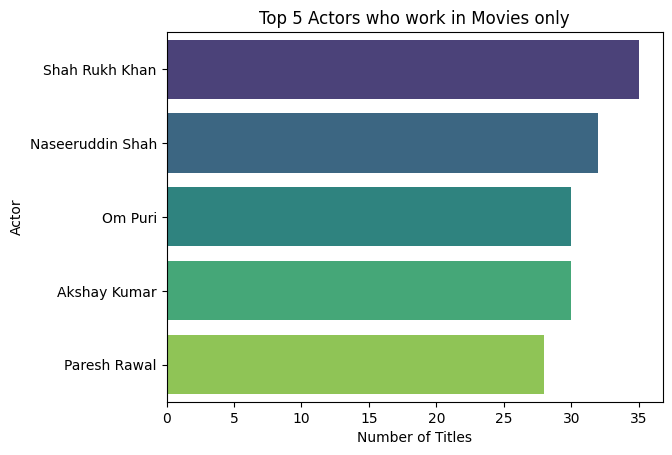

In [ ]:
sns.barplot(x=top5_movie_only.values, y=top5_movie_only.index, palette="viridis")
plt.title('Top 5 Actors who work in Movies only')
plt.ylabel('Actor')
plt.xlabel('Number of Titles')
plt.show()

Insights :- Movie-only actors 'Shah Rukh Khan' dominate in India → Netflix should invest in Bollywood films.”

In [ ]:
#Top 5 actors who work in TV only

tv_only_actors = tv_actors - movie_actors

# Keep only rows for movie-only actors
tv_only_df = df_exploded[df_exploded["cast"].isin(tv_only_actors)]

# Count their appearances and show top 5
top5_tv_only = tv_only_df["cast"].value_counts().head(5)
print(top5_tv_only)

cast
Nobuhiko Okamoto    12
Ryohei Kimura       11
Kaito Ishikawa      11
Tay Ping Hui        11
Koji Yusa            9
Name: count, dtype: int64


/tmp/ipython-input-2935484858.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_tv_only.values, y=top5_tv_only.index, palette="viridis")


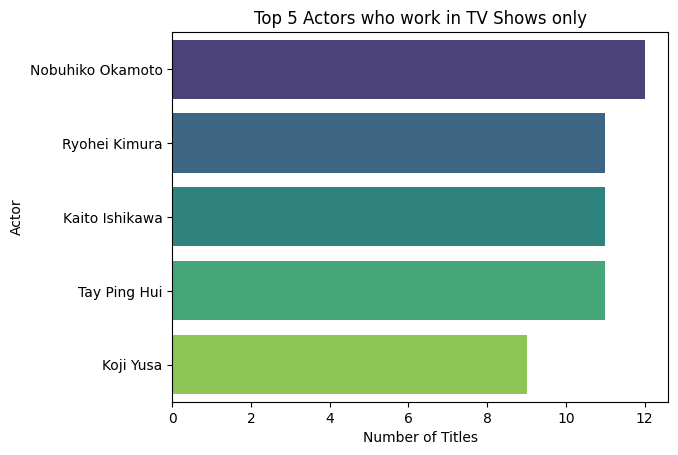

In [ ]:
sns.barplot(x=top5_tv_only.values, y=top5_tv_only.index, palette="viridis")
plt.title('Top 5 Actors who work in TV Shows only')
plt.ylabel('Actor')
plt.xlabel('Number of Titles')
plt.show()

Insights:- 'Nobuhiko Okamoto' is the most popular actor who acts in TV Shows only.

In [ ]:
#TOP 5 actors who work in both and is globally popular.

# From exploded dataframe (single actor per row)
movie_actors = set(df_exploded.loc[df_exploded["type"] == "Movie", "cast"])
tv_actors = set(df_exploded.loc[df_exploded["type"] == "TV Show", "cast"])

# Intersection = actors who appear in both Movies & TV Shows
both_actors = movie_actors & tv_actors

# Keep only rows where cast is in both
actor_both = df_exploded[df_exploded["cast"].isin(both_actors)]

# Count appearances by type
count_by_type = actor_both.groupby(["cast", "type"]).size().unstack(fill_value=0)
count_by_type["total"] = count_by_type.sum(axis=1)

# Top 5 actors who acted in both
top_5_actors_both = count_by_type.sort_values(by="total", ascending=False).head(5).drop(columns="total")
print(top_5_actors_both)


type              Movie  TV Show
cast                            
Anupam Kher          42        1
Julie Tejwani        28        5
Takahiro Sakurai      7       25
Rupa Bhimani         27        4
Yuki Kaji            10       19


<Figure size 1000x600 with 0 Axes>

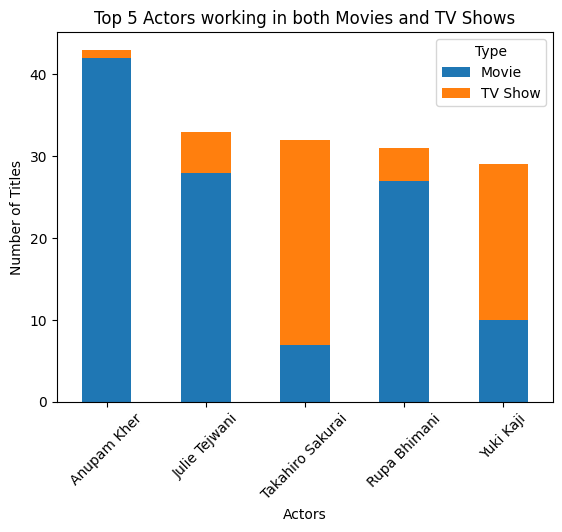

In [ ]:
#plotting above analysis

plt.figure(figsize=(10,6))
top_5_actors_both.plot(kind='bar', stacked=True)
plt.title('Top 5 Actors working in both Movies and TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Actors')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

Insights:- Both-category talent 'Anupam Kher' the most famous actor which dominates globally and gives Netflix flexibility to cast across formats.

**9. Are there regional actors/directors (e.g., strong in India, Korea, etc.)?**

In [ ]:
#Top regional actors

#filter the data wrt country
actor_country_counts=(df_exploded.groupby(['country','cast']).size().reset_index(name="count"))

# Dominant country per actor
actor_dominant_region = actor_country_counts.loc[
    actor_country_counts.groupby("cast")["count"].idxmax()
]

# Top regional actors
top_regional_actors = actor_dominant_region.sort_values("count", ascending=False)
print(top_regional_actors.head(5))

      country              cast  count
8757    India       Anupam Kher     40
11164   India    Shah Rukh Khan     32
14596   Japan  Takahiro Sakurai     29
10228   India  Naseeruddin Shah     29
8606    India  Amitabh Bachchan     28


Insights :- 'Anupam Kher','Shahrukh Khan','Amitabh Bachchan' are strongly casts for Indian movies/tv_shows.
'Takahiro Sakurai' strong casts for Japan movies/tv_shows.

In [ ]:
#Top regional directors

director_country_counts=(df_exploded.groupby(['country','director']).size().reset_index(name="count"))

# Dominant country per actor
director_dominant_region = director_country_counts.loc[
    director_country_counts.groupby("director")["count"].idxmax()
]

# Top regional actors
top_regional_director = director_dominant_region.sort_values("count", ascending=False)
print(top_regional_director.head(5))

            country             director  count
1949    Philippines  Cathy Garcia-Molina    125
3736  United States      Martin Scorsese     90
956           India         David Dhawan     90
1884        Nigeria       Kunle Afolayan     76
2376         Turkey       Yılmaz Erdoğan     75


Insights :-
*   'David Dhawan' is the regional director which strongly directs Indian movies/tv_shows
*   'Yılmaz Erdoğan' is for Turkey.
*   'Kunle Afolayan' is for Nigeria.
*   'Martin Scorsese' is for United States.
*   'Cathy Garcia-Molina' is for Philippines.










**10. Top 10 directors by count.**

In [ ]:
top_10_directors=pd.Series(all_directors).value_counts().head(10)


/tmp/ipython-input-2924332875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="viridis")


<Axes: ylabel='None'>

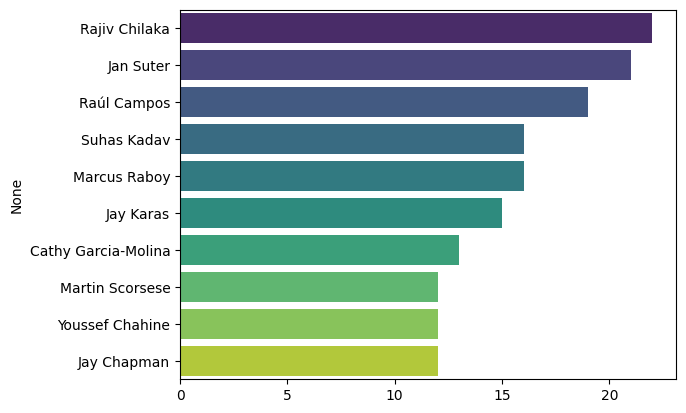

In [ ]:
#plot top_10_directors.
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="viridis")

**11. Top 10 actors by count**

In [ ]:
top_10_actor=pd.Series(all_actors).value_counts().head(10)

/tmp/ipython-input-3951297598.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actor.values, y=top_10_actor.index, palette="viridis")


<Axes: ylabel='None'>

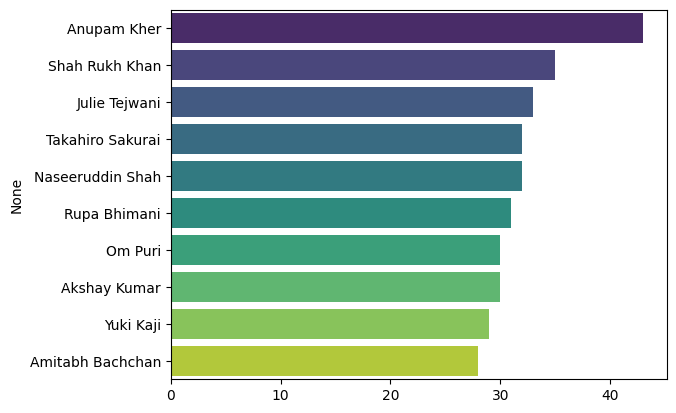

In [ ]:
sns.barplot(x=top_10_actor.values, y=top_10_actor.index, palette="viridis")

**12. Compare genres across regions.**

In [35]:
#top 5 genre for each region separately
top_5_genres_region = (
    df.groupby([filtered_df["country"], genre])
      .size()
      .reset_index(name="count")
      .sort_values(["country", "count"], ascending=[True, False])
      .groupby("country")
      .head(5)
)

top_5_genres_canada=top_5_genres_region[top_5_genres_region['country']=='Canada']
top_5_genres_United_States=top_5_genres_region[top_5_genres_region['country']=='United States'].head(5)
top_5_genres_India=top_5_genres_region[top_5_genres_region['country']=='India'].head(5)
top_5_genres_United_Kingdom=top_5_genres_region[top_5_genres_region['country']=='United Kingdom'].head(5)
print(top_5_genres_canada)



   country                 level_1  count
8   Canada    International Movies     28
33  Canada                  Dramas     16
36  Canada  International TV Shows     15
29  Canada                Comedies     10
5   Canada                  Dramas      8


/tmp/ipython-input-3251630269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_genres_canada["country"] = "Canada"


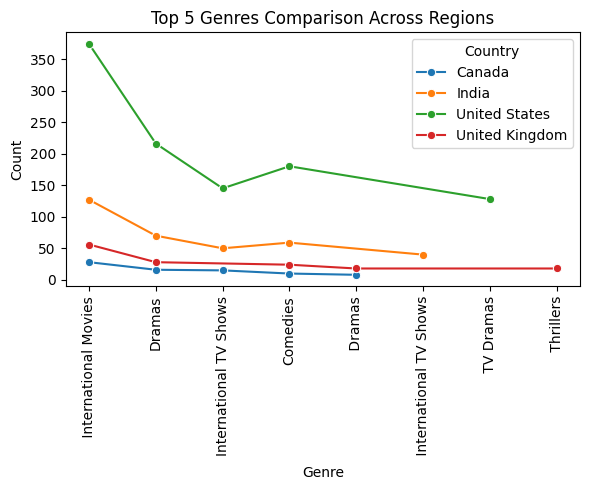

In [38]:
#combining the 4 regions genres into one graph

# Add country label
top_5_genres_canada["country"] = "Canada"
top_5_genres_India["country"] = "India"
top_5_genres_United_States["country"] = "United States"
top_5_genres_United_Kingdom["country"] = "United Kingdom"

# Combine all into one DataFrame
combined_genres = pd.concat([
    top_5_genres_canada,
    top_5_genres_India,
    top_5_genres_United_States,
    top_5_genres_United_Kingdom
])
plt.figure(figsize=(6,5))

sns.lineplot(
    data=combined_genres,
    x="level_1", y="count", hue="country", marker="o"
)

plt.title("Top 5 Genres Comparison Across Regions")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


Insights:-

*   'International Movies' genre is the most streamed on Netflix.
*   'United States' dominates among all countries listed on Netflix.




###Missing Values Heatmap

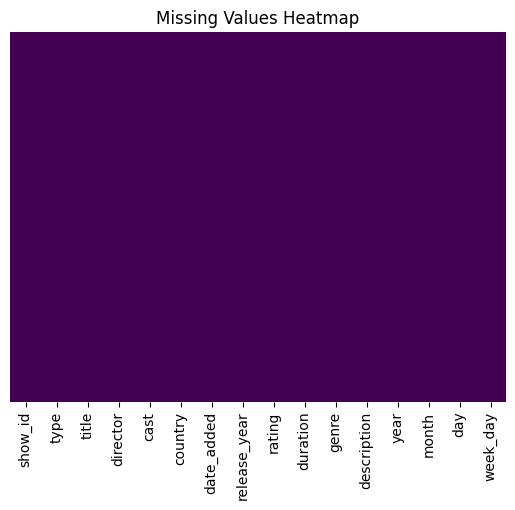

In [45]:
sns.heatmap(df.isnull(),
            cbar=False,
            cmap="viridis",
            yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

###Outliers Plotting

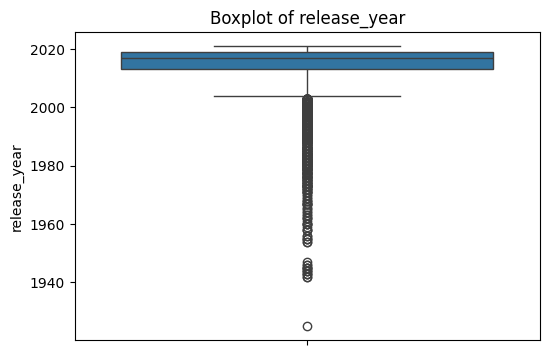

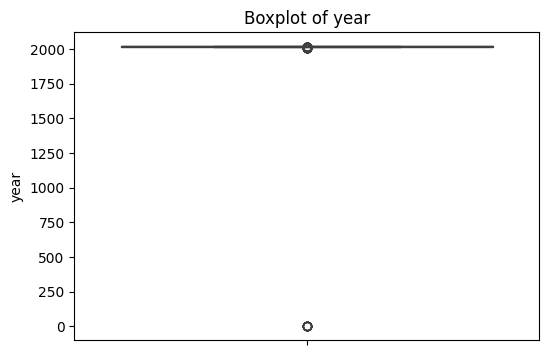

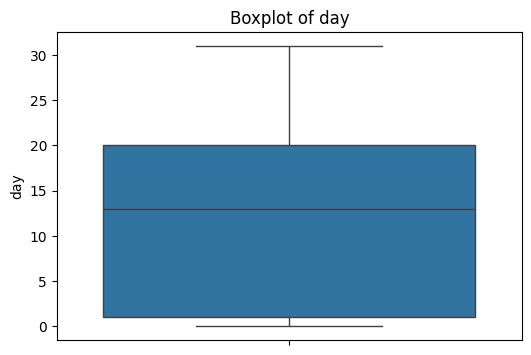

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Insight (Boxplot of Release Year):

The data is heavily skewed toward recent years (mostly post-2000).

A high number of outliers are seen for years before 2000, indicating older records that are not typical.

The median is close to 2020, suggesting most entries are from recent decades.

# Overall Insights:

1.   **Problem Statement & Metrics** :- The case study clearly defines Netflix’s challenge: understanding its movie and TV show catalog to identify patterns that influence audience engagement.

Key metrics like number of titles, content type distribution, release years, genres, countries, and cast/directors are analyzed.

2.   **Data Structure & Quality** :- Dataset includes attributes such as type, title, director, cast, country, date_added, release_year, rating, duration, and listed_in.

Several categorical variables were converted appropriately. Missing values are present in director, cast, and country, which is common in entertainment datasets.

Statistical summaries showed uneven distributions (e.g., more recent titles than older ones).

3. **Non-Graphical Analysis** :- Majority of the titles are Movies (~70%), with TV Shows making up the rest.

Value counts show concentration of content in the US, India, UK, Canada, and a few other dominant countries.

Ratings are skewed towards TV-MA and TV-14, indicating Netflix caters more to adult and young-adult audiences.

4. **Visual Analysis** :- Univariate (Continuous): Release years show a spike post-2015, reflecting aggressive content expansion.

Categorical: Boxplots highlight that certain directors/actors dominate Netflix’s catalog.

Bivariate: Correlation between country and content type reveals that India produces more movies, while the US has a stronger share of TV shows.

5. **Missing Values & Outliers** :- Missing directors/casts may bias analysis but reflect industry realities (not all shows have a single director or a well-documented cast).

Outliers exist in duration (e.g., unusually long or short content) but are explainable as series vs short films.

6. **Key Insights from Analysis** :- Range of attributes: Years span mainly from 1940s–2020s, but clustering is recent (2010+).

Distribution: Movies dominate, but TV shows are rising fast in Netflix’s catalog.

7. **Relationships** :- Certain countries specialize in certain genres.

Family-oriented content (TV-Y, TV-G) is relatively scarce compared to mature content.

Some directors/actors contribute disproportionately to Netflix’s library, showing reliance on key partnerships.

8. **Business Insights** :- Netflix’s strategy has shifted to volume expansion post-2015, with more diverse country representation.

Heavy focus on mature content may alienate younger/family audiences.

Strong dependence on US and Indian markets suggests limited global diversification in some regions.

Certain genres like Documentaries, Stand-Up Comedy, and International Dramas are growing and can drive niche engagement.

# Recommendations

1. **Content Diversification** :- Invest more in family and kids content to balance the mature-heavy catalog. This can widen the subscriber base to households.

2. **Partnerships with Key Talent** :- Leverage relationships with high-output directors/actors, but also invest in new talent discovery to reduce over-reliance on a few individuals.

3. **Genre Strategy** :- Expand in popular emerging genres (e.g., K-Dramas, Anime, True Crime, and Documentaries) where audience engagement is rising.

4. **Sustain Growth Beyond 2015 Spike** :- Instead of just adding more titles, Netflix should prioritize quality and audience resonance, ensuring sustainable growth in watch hours, not just catalog size.